In [1]:
#import library yang dibutuhkan 

import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [2]:
data = pd.read_csv('dataset_baru.csv')
data.head()

,Unnamed: 0,gender,umur,tensi,riwayat jantung,tempat tinggal,gula darah,berat badan,stroke,tipe kerja_Govt_job,tipe kerja_Never_worked,tipe kerja_Private,tipe kerja_Self-employed,tipe kerja_children
0,0,1,67.0,0,1,1,228.69,36.600000,1,0,0,1,0,0
1,1,0,61.0,0,0,0,202.21,28.891511,1,0,0,0,1,0
2,2,1,80.0,0,1,0,105.92,32.500000,1,0,0,1,0,0
3,3,0,49.0,0,0,1,171.23,34.400000,1,0,0,1,0,0
4,4,0,79.0,1,0,0,174.12,24.000000,1,0,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                5109 non-null   int64  
 1   gender                    5109 non-null   int64  
 2   umur                      5109 non-null   float64
 3   tensi                     5109 non-null   int64  
 4   riwayat jantung           5109 non-null   int64  
 5   tempat tinggal            5109 non-null   int64  
 6   gula darah                5109 non-null   float64
 7   berat badan               5109 non-null   float64
 8   stroke                    5109 non-null   int64  
 9   tipe kerja_Govt_job       5109 non-null   int64  
 10  tipe kerja_Never_worked   5109 non-null   int64  
 11  tipe kerja_Private        5109 non-null   int64  
 12  tipe kerja_Self-employed  5109 non-null   int64  
 13  tipe kerja_children       5109 non-null   int64  
dtypes: float

In [3]:
x = data.drop(['Unnamed: 0', 'stroke'], axis=1)
y = data['stroke']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Algoritma Supervised Learning

## 1. K-Nearest Neighbors (KNN)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

In [68]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [69]:
knn.score(x_test, y_test)

0.9406392694063926

In [70]:
y_pred = knn.predict(x_test)

In [71]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



In [73]:
confusion_matrix(y_test, y_pred)

array([[1442,    2],
       [  89,    0]], dtype=int64)

C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


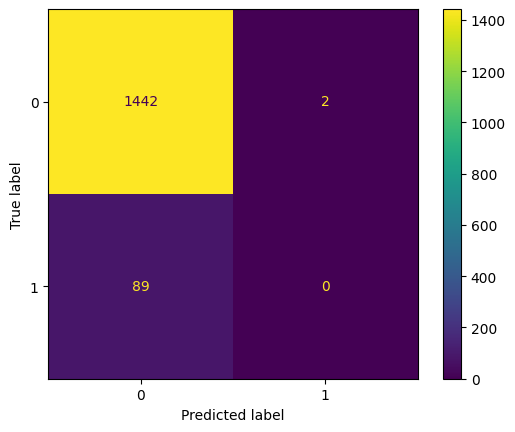

In [74]:
plot_confusion_matrix(knn, x_test, y_test)

In [75]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [2,3,4,5,6,7]}
grid = GridSearchCV(knn, params, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=6),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7]},
             scoring='accuracy')

In [76]:
print(grid.best_params_)

{'n_neighbors': 6}


## 2. Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2)

In [80]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [81]:
y_pred = dt.predict(x_test)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [83]:
confusion_matrix(y_test, y_pred)

array([[1444,    0],
       [  89,    0]], dtype=int64)

C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


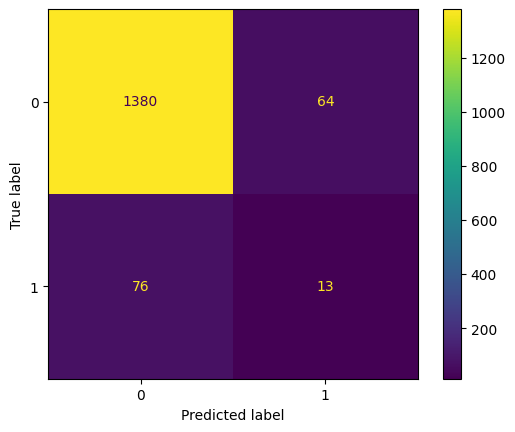

In [22]:
plot_confusion_matrix(dt, x_test, y_test)

In [87]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [7,6,5,4,3,2]}
grid = GridSearchCV(dt, params, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [7, 6, 5, 4, 3, 2]}, scoring='accuracy')

In [88]:
print(grid.best_params_)

{'max_depth': 2}


## 3. Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import BernouliNB

nb1 = GaussianNB()
nb2 = MultinomialNB()

In [24]:
nb1.fit(x_train,y_train)

GaussianNB()

In [25]:
nb2.fit(x_train, y_train)

MultinomialNB()

In [26]:
nb1_pred = nb1.predict(x_test)
nb2_pred = nb2.predict(x_test)

In [27]:
print(classification_report(y_test, nb1_pred))

              precision    recall  f1-score   support

           0       0.99      0.56      0.71      1444
           1       0.11      0.90      0.20        89

    accuracy                           0.58      1533
   macro avg       0.55      0.73      0.45      1533
weighted avg       0.94      0.58      0.68      1533



In [28]:
print(classification_report(y_test, nb2_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1444
           1       0.13      0.42      0.20        89

    accuracy                           0.81      1533
   macro avg       0.55      0.62      0.55      1533
weighted avg       0.91      0.81      0.85      1533



C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


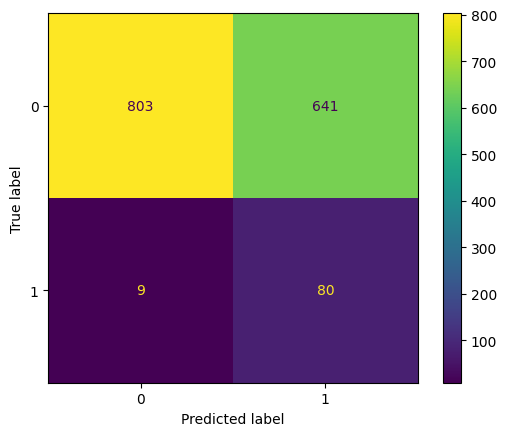

In [29]:
plot_confusion_matrix(nb1, x_test, y_test)

C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


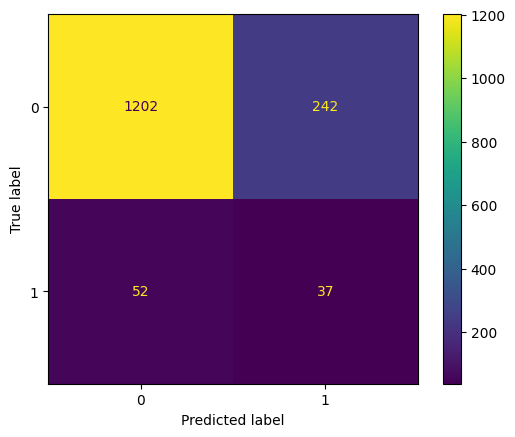

In [30]:
plot_confusion_matrix(nb2, x_test, y_test)

## Suport Vector Machine

In [32]:
from sklearn.svm import SVC

svm = SVC()

In [33]:
svm.fit(x_train, y_train)

SVC()

In [34]:
y_pred = svm.predict(x_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


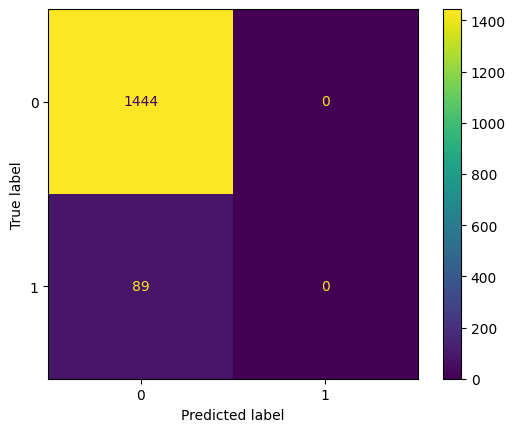

In [36]:
plot_confusion_matrix(svm, x_test, y_test)

## 5. Linear Regression

In [89]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [90]:
df.isna().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

In [96]:
df = df.rename(columns={'YearsExperience':'pengalaman', 'Age':'umur', 'Salary':'gaji'})

In [97]:
df.head()

,pengalaman,umur,gaji
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [105]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression()

In [114]:
lg.fit(df[['pengalaman', 'umur']], df.gaji)

LinearRegression()

In [115]:
print(lg.predict([[1.1,21]]))

[38662.98691225]


C:\Users\PC-00\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.